In [1]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import pystan 
import pandas as pd
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import pickle
from tqdm.notebook import tqdm as tqdm

In [2]:
sm = pickle.load(open('stan_model_µ_max.pkl', 'rb'))

In [3]:
datum = pd.read_csv('../../data/Metadata/all_lis_growth.csv', encoding='UTF-8')
datum=datum[(np.invert((datum['mu_max']==0)|np.isnan(datum['mu_max'])))]
datum_WM=datum[
    (np.invert((datum['mu_max']==0)|np.isnan(datum['mu_max'])))&
    (datum['Product']=="Whole milk")]
datum_SM=datum[
    (np.invert((datum['mu_max']==0)|np.isnan(datum['mu_max'])))&
    (datum['Product']=="Skimmed milk")]
datum_SSM=datum[
    (np.invert((datum['mu_max']==0)|np.isnan(datum['mu_max'])))&
    (datum['Product']=="Semi-skimmed milk")]
datum_others=datum[
    (np.invert((datum['mu_max']==0)|np.isnan(datum['mu_max'])))&
    (np.invert((datum['Product']=="Whole milk")|
     (datum['Product']=="Skimmed milk")|
     (datum['Product']=="Semi-skimmed milk")))]
print(datum)

                                                Source          Species   \
0                                                    1  L. monocytogenes   
1                                                    1  L. monocytogenes   
2                                                    1  L. monocytogenes   
3                                                    1  L. monocytogenes   
4                                                    1  L. monocytogenes   
..                                                 ...               ...   
106                                                 29  L. monocytogenes   
107                                                 30  L. monocytogenes   
108  Food Standards Agency funded data generated at...  L. monocytogenes   
109  Food Standards Agency funded data generated at...  L. monocytogenes   
110  Food Standards Agency funded data generated at...  L. monocytogenes   

        Strain Product group             Product    Treatment  \
0      Scott A        

In [4]:
datum["temperature"]

0       7.0
1      14.0
2      10.0
3      10.0
4      10.0
       ... 
106    20.0
107     6.7
108     5.0
109     7.0
110    10.0
Name: temperature, Length: 110, dtype: float64

In [5]:
np.mean(datum["temperature"])

8.518181818181818

In [6]:
T_ref=np.mean(datum["temperature"])
fit_nuts_µ_max = sm.sampling(
    data=dict(T = datum["temperature"], 
              mu_max = datum['mu_max'], 
              T_ref = T_ref,
              N = len(datum["temperature"])), 
    iter=30000, chains=4, thin=1, warmup=5000, seed=1234, control = dict(adapt_delta = 0.95, max_treedepth=15)
    )


with open('fit_nuts_µ_max.pkl', 'wb') as g:
    pickle.dump(fit_nuts_µ_max, g)


print(fit_nuts_µ_max)


Gradient evaluation took 0.000192 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.92 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 5.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.57 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 5.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.51 seconds.
Adjust your expectations accordingly!


Iteration:     1 / 30000 [  0%]  (Warmup)
Iteration:     1 / 30000 [  0%]  (Warmup)
Iteration:     1 / 30000 [  0%]  (Warmup)

Gradient evaluation took 4.9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
Adjust your expectations accordingly!


Iteration:     1 / 30000 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 26)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 26)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or

Iteration:  3000 / 30000 [ 10%]  (Warmup)
Iteration:  3000 / 30000 [ 10%]  (Warmup)
Iteration:  3000 / 30000 [ 10%]  (Warmup)
Iteration:  3000 / 30000 [ 10%]  (Warmup)
Iteration:  5001 / 30000 [ 16%]  (Sampling)
Iteration:  5001 / 30000 [ 16%]  (Sampling)
Iteration:  5001 / 30000 [ 16%]  (Sampling)
Iteration:  5001 / 30000 [ 16%]  (Sampling)
Iteration:  8000 / 30000 [ 26%]  (Sampling)
Iteration:  8000 / 30000 [ 26%]  (Sampling)
Iteration:  8000 / 30000 [ 26%]  (Sampling)
Iteration:  8000 / 30000 [ 26%]  (Sampling)
Iteration: 11000 / 30000 [ 36%]  (Sampling)
Iteration: 11000 / 30000 [ 36%]  (Sampling)
Iteration: 11000 / 30000 [ 36%]  (Sampling)
Iteration: 14000 / 30000 [ 46%]  (Sampling)
Iteration: 11000 / 30000 [ 36%]  (Sampling)
Iteration: 14000 / 30000 [ 46%]  (Sampling)
Iteration: 14000 / 30000 [ 46%]  (Sampling)
Iteration: 17000 / 30000 [ 56%]  (Sampling)
Iteration: 17000 / 30000 [ 56%]  (Sampling)
Iteration: 17000 / 30000 [ 56%]  (Sampling)
Iteration: 14000 / 30000 [ 46%]  (Sampli

/opt/anaconda3/envs/pystan/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  if sys.path[0] == '':


Inference for Stan model: anon_model_cedeb9f7dfc17d8b7d0b441c7e3c0fe5.
4 chains, each with iter=30000; warmup=5000; thin=1; 
post-warmup draws per chain=25000, total post-warmup draws=100000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_ref   0.03  3.3e-6 8.8e-4   0.03   0.03   0.03   0.03   0.03  73617    1.0
s_mu     0.03  6.7e-6 1.9e-3   0.02   0.03   0.03   0.03   0.03  79754    1.0
T_min   -3.47  2.1e-3   0.57  -4.68  -3.84  -3.45  -3.08  -2.42  71801    1.0
M[1]     0.15  1.1e-5 2.8e-3   0.14   0.14   0.15   0.15   0.15  67271    1.0
M[2]     0.25  1.4e-5 4.3e-3   0.24   0.24   0.25   0.25   0.25  97129    1.0
M[3]     0.19  9.6e-6 2.8e-3   0.18   0.19   0.19   0.19   0.19  84351    1.0
M[4]     0.19  9.6e-6 2.8e-3   0.18   0.19   0.19   0.19   0.19  84351    1.0
M[5]     0.19  9.6e-6 2.8e-3   0.18   0.19   0.19   0.19   0.19  84351    1.0
M[6]     0.19  9.6e-6 2.8e-3   0.18   0.19   0.19   0.19   0.19  84351    1.0
M[7]     0.19  9.6e-6 2.8e-

Progress:   0%|          | 0/29 [00:00<?, ?it/s]

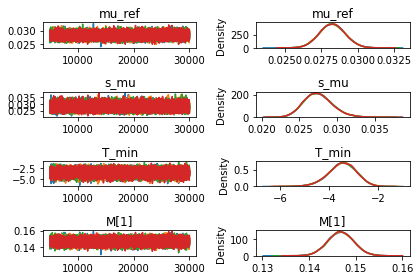

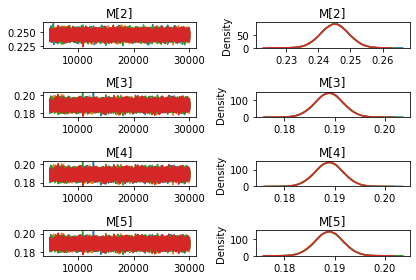

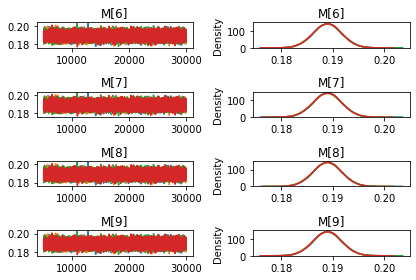

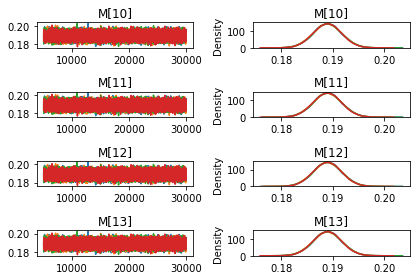

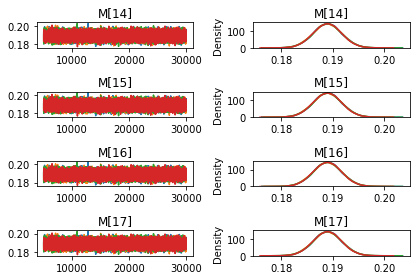

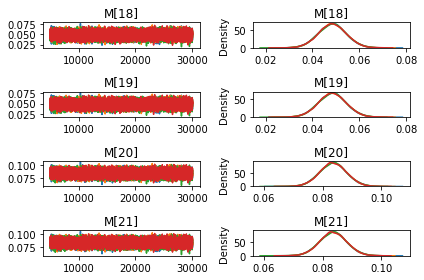

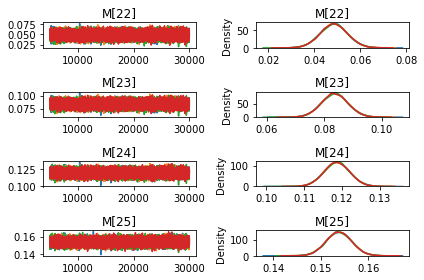

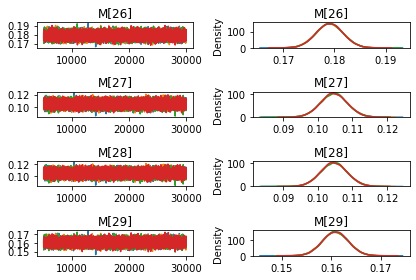

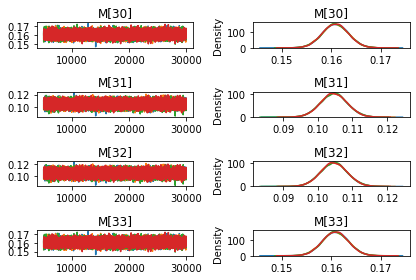

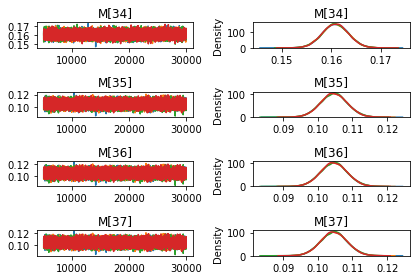

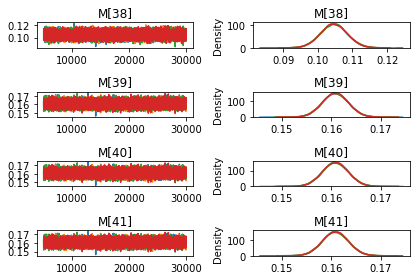

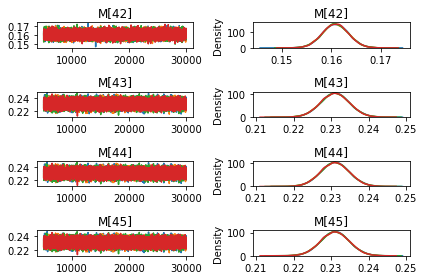

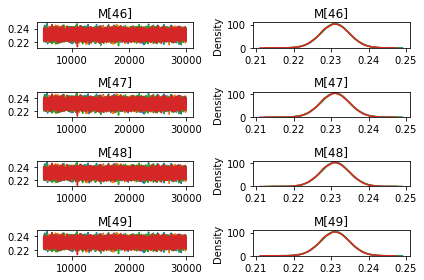

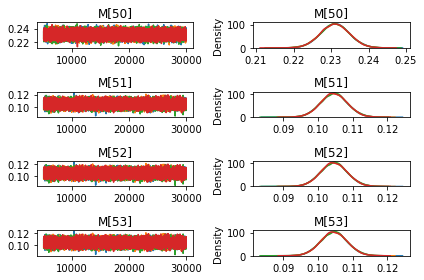

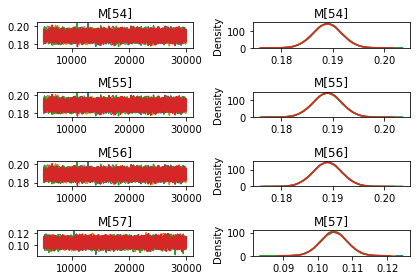

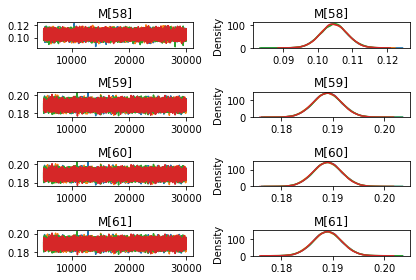

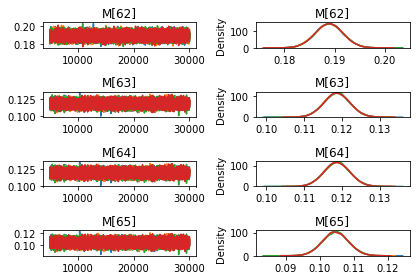

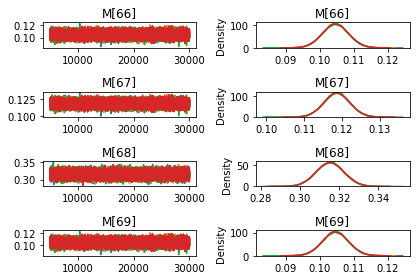

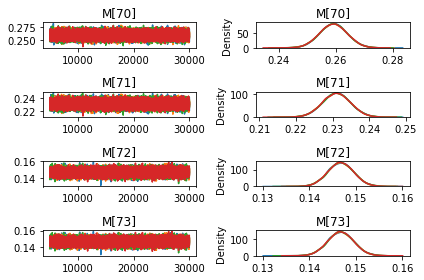

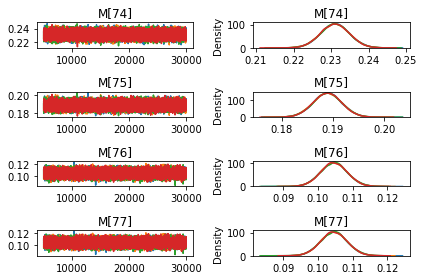

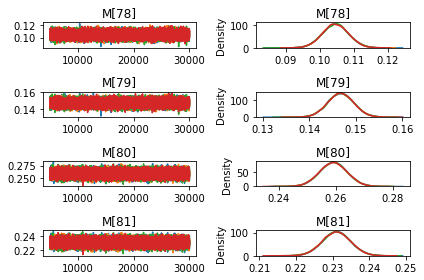

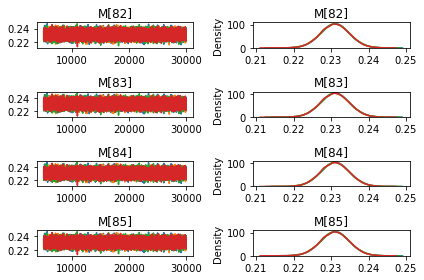

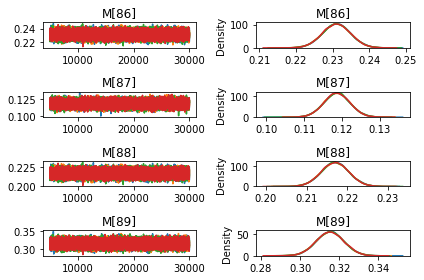

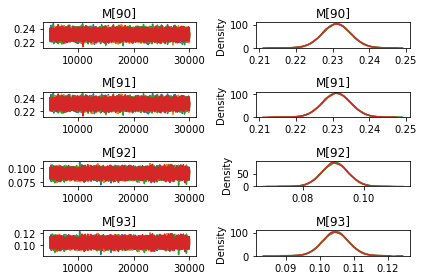

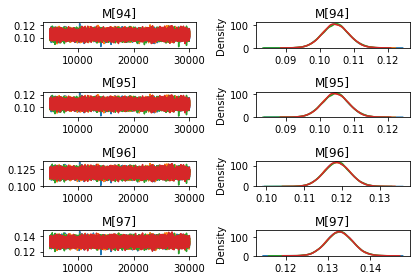

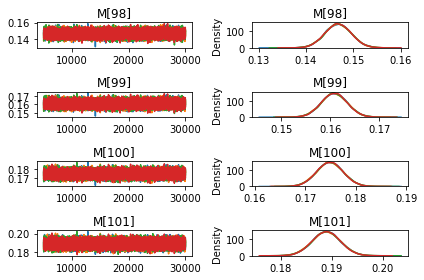

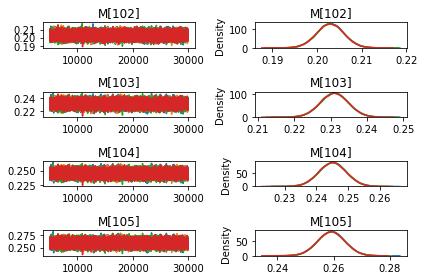

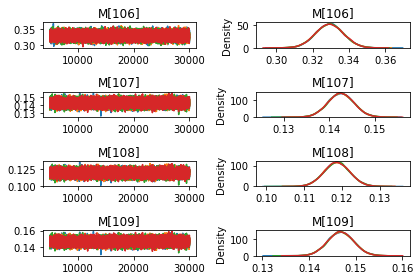

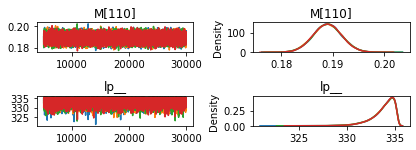

In [7]:
samples = fit_nuts_µ_max.extract(permuted=False, inc_warmup=True)
paraname = fit_nuts_µ_max.sim["fnames_oi"]
palette = sns.color_palette()
ms = fit_nuts_µ_max.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts_µ_max.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts_µ_max.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)
for pg in tqdm(range(num_pages),desc='Progress', leave=False):
    plt.figure()
    
    for pos in range(4):
        pi = pg*4 + pos
        if pi >= len(paraname): break
        plt.subplot(4, 2, 2*pos+1)
        plt.tight_layout()
        [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
        plt.subplot(4, 2, 2*(pos+1))
        plt.tight_layout()
        [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
        plt.title(paraname[pi])
    
    plt.show()

In [8]:

def Fit_Model(T,T_ref, mu_ref, T_min) :
    return (mu_ref)**0.5*((T-T_min)/(T_ref-T_min))
samples = fit_nuts_µ_max.extract(permuted=True)
temp_min = -20
temp_max = 30
devide = (temp_max-temp_min)*10
temp_interval = np.arange(temp_min, temp_max*(devide+1)/devide, 
                          (temp_max-temp_min)/devide, dtype="float")
Num_mcmc = len(samples["lp__"])
mu_conf_mcmc = np.zeros((len(temp_interval),Num_mcmc), dtype=float)
mu_conf_mcmc_quantile = np.zeros((len(temp_interval), 3), dtype=float)
mu_predict_mcmc = np.zeros((len(temp_interval),Num_mcmc), dtype=float)
mu_predict_mcmc_quantile = np.zeros((len(temp_interval), 3), dtype=float)
for j in tqdm(range(len(temp_interval)),desc='Progress', leave=False):
    for k in range(Num_mcmc):
        mu_conf_mcmc[j,k] = Fit_Model(temp_interval[j], T_ref, samples["mu_ref"][k], samples["T_min"][k])
        mu_predict_mcmc[j,k] = np.random.normal(Fit_Model(temp_interval[j], 
                                                           T_ref,
                                                           samples["mu_ref"][k],
                                                           samples["T_min"][k]),
                                                 samples["s_mu"][k])

    mu_conf_mcmc_quantile[j,:] = np.quantile(mu_conf_mcmc[j,:],[0.025,  0.5, 0.975])
    mu_predict_mcmc_quantile[j,:] = np.quantile(mu_predict_mcmc[j,:],[0.025,  0.5, 0.975])

Progress:   0%|          | 0/501 [00:00<?, ?it/s]

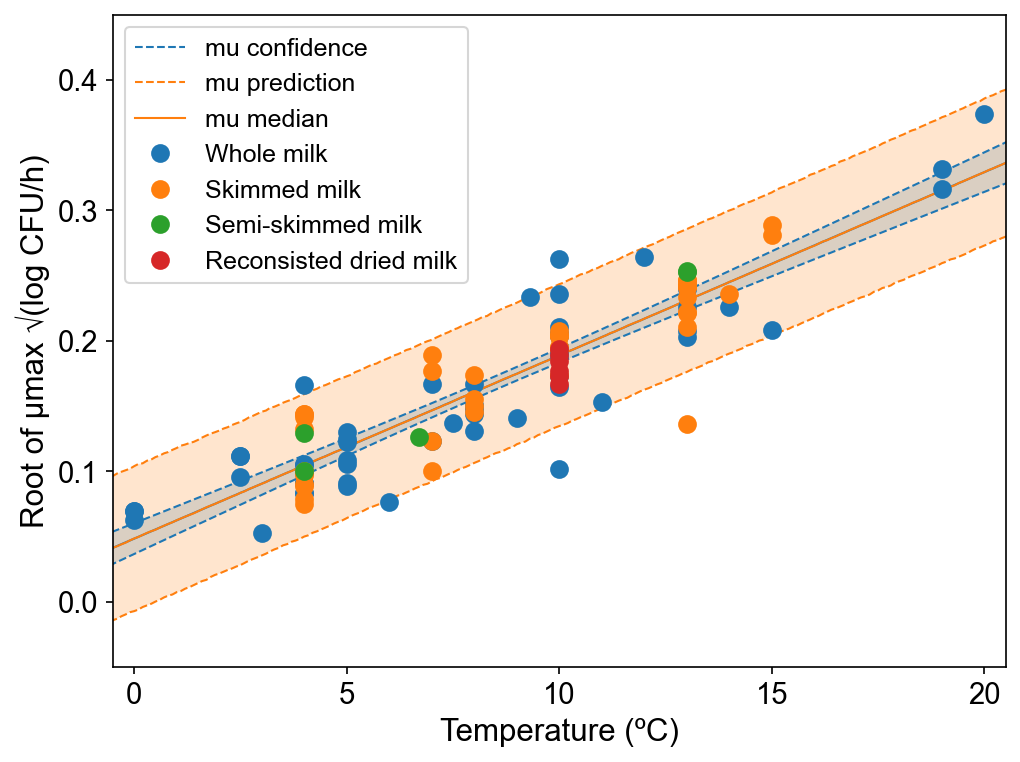

In [9]:
pdf = PdfPages("Fig. S1b.pdf")
plt.figure(figsize=[6.4*1.2, 4.8*1.2], dpi=150)
plt.rcParams["font.family"] = "Arial"

plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Temperature (ºC)",size=15,fontname="Arial")
plt.ylabel("Root of µmax √(log CFU/h)",size=15,fontname="Arial")
plt.xticks(np.arange(-0, 21, 5))
plt.ylim([-0.05,0.45])
plt.xlim([-0.5,20.5])

Palette=sns.color_palette(n_colors = 3)
plt.fill_between(temp_interval, mu_conf_mcmc_quantile[:,0], mu_conf_mcmc_quantile[:,2], facecolor=Palette[0], alpha=0.2)
plt.plot(temp_interval, mu_conf_mcmc_quantile[:,0], lw=1, color=Palette[0], linestyle='--')
plt.plot(temp_interval, mu_conf_mcmc_quantile[:,2], lw=1, color=Palette[0], linestyle='--', label="mu confidence")
plt.plot(temp_interval, mu_conf_mcmc_quantile[:,1], lw=1, color=Palette[0])

plt.fill_between(temp_interval, mu_predict_mcmc_quantile[:,0], mu_predict_mcmc_quantile[:,2], facecolor=Palette[1], alpha=0.2)
plt.plot(temp_interval, mu_predict_mcmc_quantile[:,0], lw=1, color=Palette[1], linestyle='--')
plt.plot(temp_interval, mu_predict_mcmc_quantile[:,2], lw=1, color=Palette[1], linestyle='--', label="mu prediction")
plt.plot(temp_interval, mu_predict_mcmc_quantile[:,1], lw=1, color=Palette[1], label="mu median")

plt.plot(datum_WM["temperature"], (datum_WM['mu_max'])**0.5, marker='o', ms=8, lw=0, label="Whole milk")
plt.plot(datum_SM["temperature"], (datum_SM['mu_max'])**0.5, marker='o', ms=8, lw=0, label="Skimmed milk")
plt.plot(datum_SSM["temperature"], (datum_SSM['mu_max'])**0.5, marker='o', ms=8, lw=0, label="Semi-skimmed milk")
plt.plot(datum_others["temperature"], (datum_others['mu_max'])**0.5, marker='o', ms=8, lw=0, label="Reconsisted dried milk")
plt.legend(fontsize=12)


pdf.savefig()
pdf.close()
plt.show()

In [10]:
growth_rate_mean = np.zeros((len(temp_interval), 2), dtype=float)
growth_rate_mean[:,0] = temp_interval
growth_rate_mean[:,1] = mu_predict_mcmc_quantile[:,1]

with open('growth rate mean.pkl', 'wb') as g:
    pickle.dump(growth_rate_mean, g)


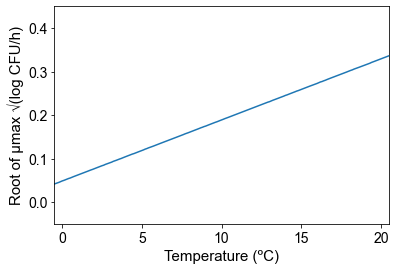

In [11]:
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Temperature (ºC)",size=15,fontname="Arial")
plt.ylabel("Root of µmax √(log CFU/h)",size=15,fontname="Arial")
plt.xticks(np.arange(-0, 21, 5))
plt.ylim([-0.05,0.45])
plt.xlim([-0.5,20.5])
plt.plot(growth_rate_mean[:,0],growth_rate_mean[:,1])
plt.show()